In [1]:
from statistics import *

## Load datasets

In [2]:
import re

source_settings = '''workedunder(person,person).
female(person).
movie(movie,person).
genre(person,genre).
actor(person).
director(person).
'''

source = REmbedding()
target = REmbedding()

lines = source_settings.split('\n')
s = {}
for line in lines:
    m = re.search('^(\w+)\(([\w, ]+)*\).$', line)
    if m:
        relation = m.group(1).replace(' ', '')
        entities = m.group(2).replace(' ', '').split(',')
        s[relation] = entities
        
source.load_settings(s)

s = []
with open('imdb.pl') as f:
    for line in f:
        m = re.search('^(\w+)\(([\w, ]+)*\).$', line)
        if m:
            relation = m.group(1).replace(' ', '')
            entities = m.group(2).replace(' ', '').split(',')
            s.append((relation, entities))
            
source.load_dataset(s)

target_settings = '''professor(person).
student(person).
hasposition(person,faculty).
taughtby(course,person).
advisedby(person,person).
tempadvisedby(person,person).
publication(title,person).
inphase(person,prequals).
courselevel(course,level).
yearsinprogram(person,year).
projectmember(project,person).
'''

lines = target_settings.split('\n')
sett = {}
for line in lines:
    m = re.search('^(\w+)\(([\w, ]+)*\).$', line)
    if m:
        relation = m.group(1).replace(' ', '')
        entities = m.group(2).replace(' ', '').split(',')
        sett[relation] = entities
        
target.load_settings(sett)

s = []
with open('uwcselearn.pl') as f:
    for line in f:
        m = re.search('^(\w+)\(ai,([\w, ]+)*\).$', line)
        if m:
            relation = m.group(1).replace(' ', '')
            entities = m.group(2).replace(' ', '').split(',')
            if relation in sett:
                s.append((relation, entities))
            
target.load_dataset(s)

## Generate random sentences

In [3]:
source.generate_sentences(max_depth=4, n_sentences=1000000)
target.generate_sentences(max_depth=4, n_sentences=1000000)

--- 23.186697244644165 seconds ---
--- 22.234455108642578 seconds ---


In [6]:
source.sentences[:20]

[['movie', 'workedunder', '_movie'],
 ['_movie', 'movie', 'workedunder'],
 ['female', 'workedunder', '_workedunder'],
 ['workedunder', '_workedunder', 'workedunder'],
 ['_movie', 'movie', 'workedunder'],
 ['workedunder', '_workedunder', 'actor'],
 ['female', 'actor', '_movie'],
 ['_workedunder', '_movie', 'movie'],
 ['_movie', 'movie', 'female'],
 ['_workedunder', 'actor', 'female'],
 ['_movie', 'movie', 'female'],
 ['_movie', 'movie', '_workedunder'],
 ['_movie', 'movie', 'workedunder'],
 ['actor', 'workedunder', '_workedunder'],
 ['_genre', '_workedunder', '_movie'],
 ['actor', '_movie', 'movie'],
 ['workedunder', '_workedunder', 'actor'],
 ['workedunder', '_workedunder', 'actor'],
 ['_workedunder', '_movie', 'movie'],
 ['workedunder', '_workedunder', '_movie']]

In [7]:
target.sentences[:20]

[['yearsinprogram', '_yearsinprogram', 'inphase'],
 ['projectmember', '_tempadvisedby', 'inphase'],
 ['publication', '_publication', 'publication'],
 ['advisedby', '_advisedby', 'yearsinprogram'],
 ['_inphase', 'advisedby', 'hasposition'],
 ['publication', '_publication', 'publication'],
 ['publication', '_publication', 'publication'],
 ['professor', 'hasposition', '_hasposition'],
 ['_courselevel', 'taughtby', '_advisedby'],
 ['publication', '_publication', 'publication'],
 ['publication', '_publication', 'publication'],
 ['professor', 'hasposition', '_hasposition'],
 ['_yearsinprogram', 'student', '_publication'],
 ['inphase', '_inphase', 'yearsinprogram'],
 ['publication', 'yearsinprogram', '_yearsinprogram'],
 ['publication', '_publication', 'publication'],
 ['publication', '_publication'],
 ['publication', '_advisedby', 'student'],
 ['publication', '_advisedby', '_publication'],
 ['publication', 'hasposition', '_hasposition']]

## Count sentences

In [15]:
import collections

source_sentences = [' '.join(i) for i in source.sentences]
target_sentences = [' '.join(i) for i in target.sentences]
source_sentences = dict(collections.Counter(source_sentences))
target_sentences = dict(collections.Counter(target_sentences))

In [16]:
source_sentences

{'_genre _movie movie': 1857,
 '_genre _workedunder _movie': 9439,
 '_genre _workedunder actor': 8740,
 '_genre _workedunder female': 2869,
 '_genre _workedunder workedunder': 2947,
 '_genre director _movie': 110,
 '_genre director _workedunder': 1343,
 '_genre director genre': 148,
 '_genre genre': 311,
 '_genre genre _genre': 2407,
 '_movie movie _movie': 6547,
 '_movie movie _workedunder': 19107,
 '_movie movie actor': 83024,
 '_movie movie director': 1564,
 '_movie movie female': 24886,
 '_movie movie genre': 2208,
 '_movie movie workedunder': 97056,
 '_workedunder _movie movie': 23770,
 '_workedunder actor _movie': 15008,
 '_workedunder actor female': 2673,
 '_workedunder actor workedunder': 4880,
 '_workedunder female _movie': 2652,
 '_workedunder female actor': 2587,
 '_workedunder female workedunder': 2352,
 '_workedunder workedunder _movie': 2759,
 '_workedunder workedunder _workedunder': 21653,
 '_workedunder workedunder director': 2851,
 '_workedunder workedunder genre': 209

In [17]:
target_sentences

{'_advisedby _publication publication': 2249,
 '_advisedby advisedby _advisedby': 66,
 '_advisedby advisedby _projectmember': 30,
 '_advisedby advisedby _publication': 118,
 '_advisedby advisedby _taughtby': 73,
 '_advisedby advisedby _tempadvisedby': 29,
 '_advisedby advisedby hasposition': 43,
 '_advisedby advisedby professor': 42,
 '_advisedby inphase _inphase': 2834,
 '_advisedby student _publication': 409,
 '_advisedby student advisedby': 104,
 '_advisedby student inphase': 1185,
 '_advisedby student yearsinprogram': 1164,
 '_advisedby yearsinprogram': 277,
 '_advisedby yearsinprogram _yearsinprogram': 2731,
 '_courselevel': 890,
 '_courselevel taughtby _advisedby': 1218,
 '_courselevel taughtby _projectmember': 46,
 '_courselevel taughtby _publication': 3266,
 '_courselevel taughtby _taughtby': 1140,
 '_courselevel taughtby _tempadvisedby': 576,
 '_courselevel taughtby hasposition': 567,
 '_courselevel taughtby professor': 475,
 '_hasposition _advisedby _publication': 695,
 '_has

In [18]:
source_statistics = get_statistics(source_sentences)
target_statistics = get_statistics(target_sentences)
source_set = get_set(source_statistics)
target_set = get_set(target_statistics)

In [19]:
source_set

{'_genre _movie movie',
 '_genre _workedunder _movie',
 '_genre _workedunder actor',
 '_genre _workedunder female',
 '_genre _workedunder workedunder',
 '_genre director _movie',
 '_genre director _workedunder',
 '_genre director genre',
 '_genre genre _genre',
 '_movie movie _movie',
 '_movie movie _workedunder',
 '_movie movie actor',
 '_movie movie director',
 '_movie movie female',
 '_movie movie genre',
 '_movie movie workedunder',
 '_workedunder _movie movie',
 '_workedunder actor _movie',
 '_workedunder actor female',
 '_workedunder actor workedunder',
 '_workedunder female _movie',
 '_workedunder female actor',
 '_workedunder female workedunder',
 '_workedunder workedunder _movie',
 '_workedunder workedunder _workedunder',
 '_workedunder workedunder director',
 '_workedunder workedunder genre',
 'actor _movie movie',
 'actor female _movie',
 'actor female workedunder',
 'actor workedunder _movie',
 'actor workedunder _workedunder',
 'actor workedunder director',
 'actor workedu

In [20]:
target_set

{'_advisedby _publication publication',
 '_advisedby advisedby _advisedby',
 '_advisedby advisedby _projectmember',
 '_advisedby advisedby _publication',
 '_advisedby advisedby _taughtby',
 '_advisedby advisedby _tempadvisedby',
 '_advisedby advisedby hasposition',
 '_advisedby advisedby professor',
 '_advisedby inphase _inphase',
 '_advisedby student _publication',
 '_advisedby student advisedby',
 '_advisedby student inphase',
 '_advisedby student yearsinprogram',
 '_advisedby yearsinprogram _yearsinprogram',
 '_courselevel taughtby _advisedby',
 '_courselevel taughtby _projectmember',
 '_courselevel taughtby _publication',
 '_courselevel taughtby _taughtby',
 '_courselevel taughtby _tempadvisedby',
 '_courselevel taughtby hasposition',
 '_courselevel taughtby professor',
 '_hasposition _advisedby _publication',
 '_hasposition _advisedby advisedby',
 '_hasposition _advisedby inphase',
 '_hasposition _advisedby student',
 '_hasposition _advisedby yearsinprogram',
 '_hasposition _publi

## Mapping IMDB -> UWCSE

In [24]:
mapping = {'workedunder': 'advisedby', 'movie': 'publication', 'actor': 'student', 'director': 'professor'}
mapped_set = map_set(mapping, source_set)
print(mapping)
print('Jaccard: %s/%s = %s' % (count_matches(mapped_set, target_set),  union_sets(mapped_set, target_set), (count_matches(mapped_set, target_set)/union_sets(mapped_set, target_set))))
print('\n')
mapping = {'workedunder': '_advisedby', 'movie': 'publication', 'actor': 'student', 'director': 'professor'}
mapped_set = map_set(mapping, source_set)
print(mapping)
print('Jaccard: %s/%s = %s' % (count_matches(mapped_set, target_set),  union_sets(mapped_set, target_set), (count_matches(mapped_set, target_set)/union_sets(mapped_set, target_set))))
print('\n')
mapping = {'workedunder': 'advisedby', 'female': 'student', 'movie': 'publication', 'actor': 'student', 'director': 'professor'}
mapped_set = map_set(mapping, source_set)
print(mapping)
print('Jaccard: %s/%s = %s' % (count_matches(mapped_set, target_set),  union_sets(mapped_set, target_set), (count_matches(mapped_set, target_set)/union_sets(mapped_set, target_set))))
print('\n')
mapping = {'workedunder': 'advisedby', 'female': 'director', 'movie': 'publication', 'actor': 'student', 'director': 'professor'}
mapped_set = map_set(mapping, source_set)
print(mapping)
print('Jaccard: %s/%s = %s' % (count_matches(mapped_set, target_set),  union_sets(mapped_set, target_set), (count_matches(mapped_set, target_set)/union_sets(mapped_set, target_set))))
print('\n')
mapping = {'female': 'director', 'movie': 'publication', 'actor': 'student', 'director': 'professor'}
mapped_set = map_set(mapping, source_set)
print(mapping)
print('Jaccard: %s/%s = %s' % (count_matches(mapped_set, target_set),  union_sets(mapped_set, target_set), (count_matches(mapped_set, target_set)/union_sets(mapped_set, target_set))))
print('\n')
mapping = {'workedunder': '_advisedby', 'female': 'director', 'movie': 'publication', 'actor': 'student', 'director': 'professor'}
mapped_set = map_set(mapping, source_set)
print(mapping)
print('Jaccard: %s/%s = %s' % (count_matches(mapped_set, target_set),  union_sets(mapped_set, target_set), (count_matches(mapped_set, target_set)/union_sets(mapped_set, target_set))))
print('\n')
mapping = {'workedunder': '_advisedby', 'movie': '_publication', 'actor': 'student', 'director': 'professor'}
mapped_set = map_set(mapping, source_set)
print(mapping)
print('Jaccard: %s/%s = %s' % (count_matches(mapped_set, target_set),  union_sets(mapped_set, target_set), (count_matches(mapped_set, target_set)/union_sets(mapped_set, target_set))))
print('\n')
mapping = {'workedunder': '_advisedby', 'movie': '_publication', 'actor': 'professor', 'director': 'student'}
mapped_set = map_set(mapping, source_set)
print(mapping)
print('Jaccard: %s/%s = %s' % (count_matches(mapped_set, target_set),  union_sets(mapped_set, target_set), (count_matches(mapped_set, target_set)/union_sets(mapped_set, target_set))))
print('\n')
mapping = {'workedunder': '_advisedby', 'movie': '_publication', 'actor': 'professor', 'director': 'professor'}
mapped_set = map_set(mapping, source_set)
print(mapping)
print('Jaccard: %s/%s = %s' % (count_matches(mapped_set, target_set),  union_sets(mapped_set, target_set), (count_matches(mapped_set, target_set)/union_sets(mapped_set, target_set))))
print('\n')
mapping = {'workedunder': 'advisedby', 'movie': '_publication', 'actor': 'professor', 'director': 'professor'}
mapped_set = map_set(mapping, source_set)
print(mapping)
print('Jaccard: %s/%s = %s' % (count_matches(mapped_set, target_set),  union_sets(mapped_set, target_set), (count_matches(mapped_set, target_set)/union_sets(mapped_set, target_set))))
print('\n')
mapping = {'workedunder': 'advisedby', 'movie': '_publication', 'actor': 'professor', 'director': 'student'}
mapped_set = map_set(mapping, source_set)
print(mapping)
print('Jaccard: %s/%s = %s' % (count_matches(mapped_set, target_set),  union_sets(mapped_set, target_set), (count_matches(mapped_set, target_set)/union_sets(mapped_set, target_set))))
print('\n')
mapping = {'workedunder': 'advisedby', 'movie': 'publication', 'actor': 'student', 'director': 'professor', 'genre': 'taughtby'}
mapped_set = map_set(mapping, source_set)
print(mapping)
print('Jaccard: %s/%s = %s' % (count_matches(mapped_set, target_set),  union_sets(mapped_set, target_set), (count_matches(mapped_set, target_set)/union_sets(mapped_set, target_set))))
print('\n')
mapping = {'workedunder': 'advisedby', 'movie': 'publication', 'actor': 'student', 'director': 'professor', 'genre': 'inphase'}
mapped_set = map_set(mapping, source_set)
print(mapping)
print('Jaccard: %s/%s = %s' % (count_matches(mapped_set, target_set),  union_sets(mapped_set, target_set), (count_matches(mapped_set, target_set)/union_sets(mapped_set, target_set))))
print('\n')
mapping = {'workedunder': 'advisedby', 'movie': 'publication', 'actor': 'professor', 'director': 'professor', 'genre': 'professor'}
mapped_set = map_set(mapping, source_set)
print(mapping)
print('Jaccard: %s/%s = %s' % (count_matches(mapped_set, target_set),  union_sets(mapped_set, target_set), (count_matches(mapped_set, target_set)/union_sets(mapped_set, target_set))))
print('\n')
mapping = {'workedunder': 'advisedby', 'movie': 'publication', 'actor': 'professor', 'director': 'professor', 'genre': '_inphase'}
mapped_set = map_set(mapping, source_set)
print(mapping)
print('Jaccard: %s/%s = %s' % (count_matches(mapped_set, target_set),  union_sets(mapped_set, target_set), (count_matches(mapped_set, target_set)/union_sets(mapped_set, target_set))))
print('\n')
mapping = {'workedunder': 'advisedby', 'movie': 'publication', 'actor': 'professor', 'director': 'professor', 'genre': 'courselevel'}
mapped_set = map_set(mapping, source_set)
print(mapping)
print('Jaccard: %s/%s = %s' % (count_matches(mapped_set, target_set),  union_sets(mapped_set, target_set), (count_matches(mapped_set, target_set)/union_sets(mapped_set, target_set))))
print('\n')
mapping = {'workedunder': 'advisedby', 'movie': 'publication', 'actor': 'professor', 'director': 'professor', 'genre': 'yearsinprogram'}
mapped_set = map_set(mapping, source_set)
print(mapping)
print('Jaccard: %s/%s = %s' % (count_matches(mapped_set, target_set),  union_sets(mapped_set, target_set), (count_matches(mapped_set, target_set)/union_sets(mapped_set, target_set))))
print('\n')
mapping = {'workedunder': 'advisedby', 'movie': 'publication', 'actor': 'professor', 'director': 'professor', 'genre': '_projectmember'}
mapped_set = map_set(mapping, source_set)
print(mapping)
print('Jaccard: %s/%s = %s' % (count_matches(mapped_set, target_set),  union_sets(mapped_set, target_set), (count_matches(mapped_set, target_set)/union_sets(mapped_set, target_set))))
print('\n')
mapping = {'workedunder': 'tempadvisedby', 'movie': 'publication', 'actor': 'student', 'director': 'professor'}
mapped_set = map_set(mapping, source_set)
print(mapping)
print('Jaccard: %s/%s = %s' % (count_matches(mapped_set, target_set),  union_sets(mapped_set, target_set), (count_matches(mapped_set, target_set)/union_sets(mapped_set, target_set))))

{'actor': 'student', 'workedunder': 'advisedby', 'director': 'professor', 'movie': 'publication'}
Jaccard: 36/258 = 0.13953488372093023


{'actor': 'student', 'workedunder': '_advisedby', 'director': 'professor', 'movie': 'publication'}
Jaccard: 20/274 = 0.072992700729927


{'actor': 'student', 'female': 'student', 'workedunder': 'advisedby', 'director': 'professor', 'movie': 'publication'}
Jaccard: 36/262 = 0.13740458015267176


{'actor': 'student', 'female': 'director', 'workedunder': 'advisedby', 'director': 'professor', 'movie': 'publication'}
Jaccard: 36/278 = 0.12949640287769784


{'actor': 'student', 'female': 'director', 'movie': 'publication', 'director': 'professor'}
Jaccard: 8/265 = 0.03018867924528302


{'actor': 'student', 'female': 'director', 'workedunder': '_advisedby', 'director': 'professor', 'movie': 'publication'}
Jaccard: 20/294 = 0.06802721088435375


{'actor': 'student', 'workedunder': '_advisedby', 'director': 'professor', 'movie': '_publication'}
Jaccard: 4/290

## Mappings UWCSE -> IMDB

In [25]:
mapping = {'advisedby': 'workedunder', 'publication': 'movie', 'student': 'actor', 'professor': 'director'}
mapped_set = map_set(mapping, target_set)
print(mapping)
print('Jaccard: %s/%s = %s' % (count_matches(mapped_set, source_set),  union_sets(mapped_set, source_set), (count_matches(mapped_set, source_set)/union_sets(mapped_set, source_set))))
print('\n')
mapping = {'advisedby': '_workedunder', 'publication': 'movie', 'student': 'actor', 'professor': 'director'}
mapped_set = map_set(mapping, target_set)
print(mapping)
print('Jaccard: %s/%s = %s' % (count_matches(mapped_set, source_set),  union_sets(mapped_set, source_set), (count_matches(mapped_set, source_set)/union_sets(mapped_set, source_set))))
print('\n')
mapping = {'advisedby': 'workedunder', 'publication': '_movie', 'student': 'actor', 'professor': 'director'}
mapped_set = map_set(mapping, target_set)
print(mapping)
print('Jaccard: %s/%s = %s' % (count_matches(mapped_set, source_set),  union_sets(mapped_set, source_set), (count_matches(mapped_set, source_set)/union_sets(mapped_set, source_set))))
print('\n')
mapping = {'advisedby': 'workedunder', 'publication': '_movie'}
mapped_set = map_set(mapping, target_set)
print(mapping)
print('Jaccard: %s/%s = %s' % (count_matches(mapped_set, source_set),  union_sets(mapped_set, source_set), (count_matches(mapped_set, source_set)/union_sets(mapped_set, source_set))))
print('\n')
mapping = {'advisedby': 'workedunder', 'publication': 'movie', 'student': 'actor', 'professor': 'director', 'inphase': 'genre'}
mapped_set = map_set(mapping, target_set)
print(mapping)
print('Jaccard: %s/%s = %s' % (count_matches(mapped_set, source_set),  union_sets(mapped_set, source_set), (count_matches(mapped_set, source_set)/union_sets(mapped_set, source_set))))
print('\n')
mapping = {'advisedby': 'workedunder', 'publication': 'movie', 'student': 'actor', 'professor': 'director', 'inphase': 'tempadvisedby'}
mapped_set = map_set(mapping, target_set)
print(mapping)
print('Jaccard: %s/%s = %s' % (count_matches(mapped_set, source_set),  union_sets(mapped_set, source_set), (count_matches(mapped_set, source_set)/union_sets(mapped_set, source_set))))
print('\n')
mapping = {'advisedby': 'workedunder', 'publication': 'movie', 'student': 'director', 'professor': 'actor', 'inphase': 'tempadvisedby'}
mapped_set = map_set(mapping, target_set)
print(mapping)
print('Jaccard: %s/%s = %s' % (count_matches(mapped_set, source_set),  union_sets(mapped_set, source_set), (count_matches(mapped_set, source_set)/union_sets(mapped_set, source_set))))

{'professor': 'director', 'advisedby': 'workedunder', 'student': 'actor', 'publication': 'movie'}
Jaccard: 36/79 = 0.45569620253164556


{'professor': 'director', 'advisedby': '_workedunder', 'student': 'actor', 'publication': 'movie'}
Jaccard: 20/95 = 0.21052631578947367


{'professor': 'director', 'advisedby': 'workedunder', 'student': 'actor', 'publication': '_movie'}
Jaccard: 12/103 = 0.11650485436893204


{'advisedby': 'workedunder', 'publication': '_movie'}
Jaccard: 4/89 = 0.0449438202247191


{'professor': 'director', 'advisedby': 'workedunder', 'inphase': 'genre', 'student': 'actor', 'publication': 'movie'}
Jaccard: 40/93 = 0.43010752688172044


{'professor': 'director', 'advisedby': 'workedunder', 'inphase': 'tempadvisedby', 'student': 'actor', 'publication': 'movie'}
Jaccard: 36/97 = 0.3711340206185567


{'professor': 'actor', 'advisedby': 'workedunder', 'inphase': 'tempadvisedby', 'student': 'director', 'publication': 'movie'}
Jaccard: 20/113 = 0.17699115044247787


## Predicates embedding

/home/rodrigoazs/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


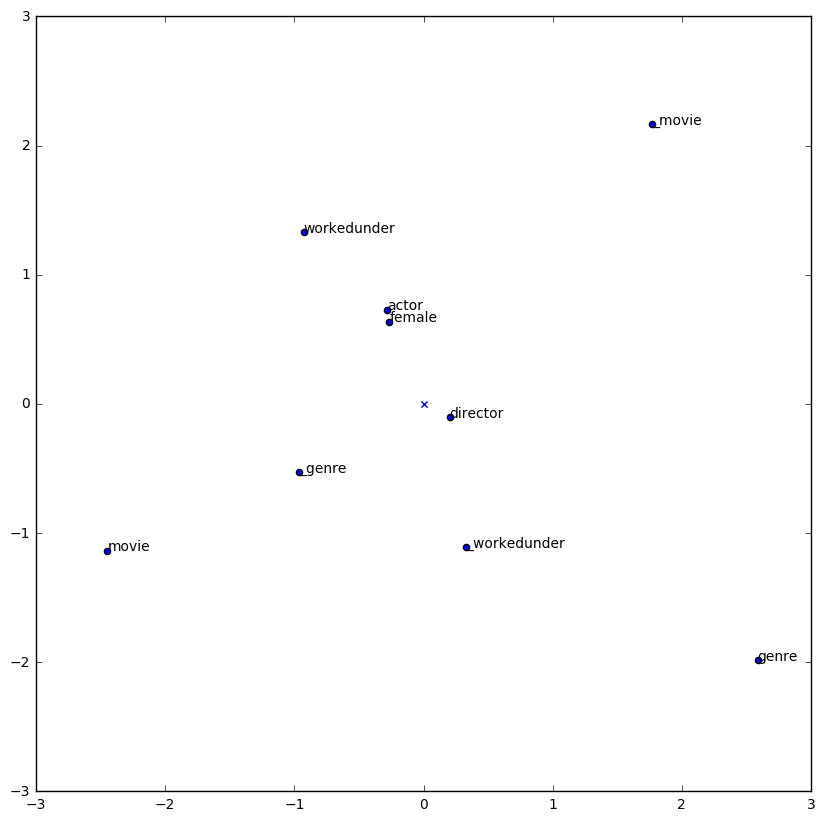

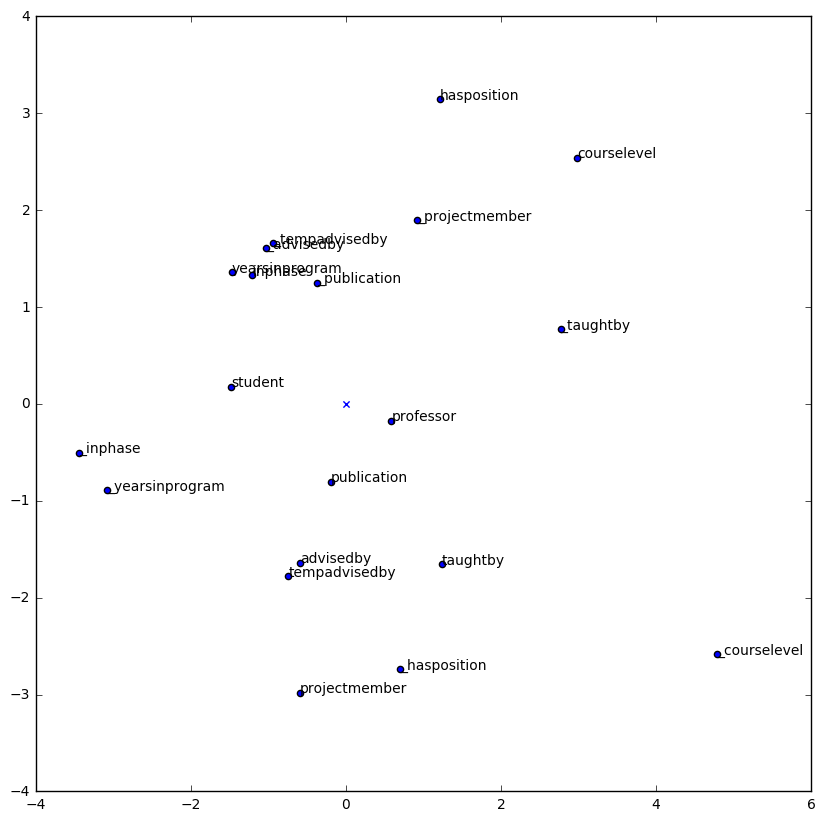

In [27]:
source.run_embedding()
target.run_embedding()
source.plot_2d(color={'person': 'r', 'movie': 'b', 'genre':'g'}, plot_centroid=True)
target.plot_2d(color={'person': 'r', 'faculty': 'b', 'course': 'g', 'title': 'y'}, plot_centroid=True)

source_centroid = source.centroid()
target_centroid = target.centroid()

source_type_centroid = source.type_centroid()
transformation = target_centroid - source_centroid

#######################################################
## plot das constelações
#source_words = {}
#for word in source.model.wv.vocab:
#    s = word.split('_')
#    if len(s) == 1 or len(s[0]) == 0:
#        source_words['s_' + word] = source.model[word]
#        
#for word in source_type_centroid:
#    source_words['s_type_' + word] = source_type_centroid[word]
#    
#source.plot_2d_vectors(source_words)
# 
#target_words = {}       
#for word in target.model.wv.vocab:
#    s = word.split('_')
#    if len(s) == 1 or len(s[0]) == 0:
#        target_words['t_' + word] = target.model[word]
# 
#target_type_centroid = target.type_centroid()
#for word in target_type_centroid:
#    target_words['t_type_' + word] = target_type_centroid[word]
#    
#target.plot_2d_vectors(target_words)
#
## plot das constelações juntas
#merge_words = source_words.copy()
#merge_words.update(target_words)
#for word in merge_words:
#    # aplica transformacao
#    if word[:2] == 's_':
#        merge_words[word] = merge_words[word] + transformation
#target.plot_2d_vectors(merge_words)
#######################################################

#target.most_similar_type(source_type_centroid['person']+transformation)
#target.most_similar_type(source_type_centroid['movie']+transformation)
#target.most_similar_type(source_type_centroid['genre']+transformation)

In [28]:
target.most_similar_predicate(source.model['workedunder']+transformation)

/home/rodrigoazs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


[('_advisedby', 0.2573627531528473),
 ('_tempadvisedby', 0.22293193638324738),
 ('_projectmember', 0.20032785832881927),
 ('tempadvisedby', 0.19780969619750977),
 ('advisedby', 0.197189599275589),
 ('_hasposition', 0.14827021956443787),
 ('_taughtby', 0.14452913403511047),
 ('inphase', 0.11475938558578491),
 ('projectmember', 0.10724508762359619),
 ('_yearsinprogram', 0.1016654223203659),
 ('student', 0.07992465049028397),
 ('hasposition', 0.07344818860292435),
 ('yearsinprogram', 0.057619012892246246),
 ('_courselevel', 0.04645814001560211),
 ('_publication', 0.03071431629359722),
 ('_inphase', 0.012176122516393661),
 ('courselevel', 0.0018215496093034744),
 ('taughtby', -0.01912938803434372),
 ('publication', -0.039318736642599106),
 ('professor', -0.09855802357196808)]

In [29]:
target.most_similar_predicate(source.model['movie']+transformation)

/home/rodrigoazs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


[('_projectmember', 0.2365504503250122),
 ('_yearsinprogram', 0.20680256187915802),
 ('inphase', 0.18793553113937378),
 ('_taughtby', 0.1740846335887909),
 ('student', 0.15604545176029205),
 ('projectmember', 0.1482177972793579),
 ('professor', 0.13411596417427063),
 ('publication', 0.09039201587438583),
 ('_courselevel', 0.08172179758548737),
 ('hasposition', 0.08022961020469666),
 ('_advisedby', 0.0667835921049118),
 ('_inphase', 0.05174463987350464),
 ('_hasposition', 0.038300804793834686),
 ('_tempadvisedby', 0.03689885884523392),
 ('yearsinprogram', 0.00461377389729023),
 ('taughtby', -0.018083658069372177),
 ('tempadvisedby', -0.042164430022239685),
 ('advisedby', -0.0941987857222557),
 ('courselevel', -0.09471426904201508),
 ('_publication', -0.10564452409744263)]

In [30]:
target.most_similar_predicate(source.model['actor']+transformation)

/home/rodrigoazs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


[('professor', 0.25321051478385925),
 ('hasposition', 0.17706172168254852),
 ('publication', 0.158647358417511),
 ('_projectmember', 0.1584840714931488),
 ('student', 0.13544012606143951),
 ('projectmember', 0.11395227909088135),
 ('tempadvisedby', 0.0928475484251976),
 ('yearsinprogram', 0.09023822098970413),
 ('_advisedby', 0.0865793377161026),
 ('_tempadvisedby', 0.0814124122262001),
 ('_inphase', 0.07190550118684769),
 ('_publication', 0.07048266381025314),
 ('advisedby', 0.06105547770857811),
 ('courselevel', 0.05226656049489975),
 ('_courselevel', 0.047708846628665924),
 ('_taughtby', 0.043566036969423294),
 ('_hasposition', 0.042370498180389404),
 ('inphase', 0.012794564478099346),
 ('_yearsinprogram', -0.01569085195660591),
 ('taughtby', -0.07027745246887207)]

In [31]:
target.most_similar_predicate(source.model['director']+transformation)

/home/rodrigoazs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


[('_projectmember', 0.3296198844909668),
 ('_advisedby', 0.2692248821258545),
 ('_tempadvisedby', 0.26122844219207764),
 ('student', 0.2052609622478485),
 ('hasposition', 0.18488505482673645),
 ('yearsinprogram', 0.1554543673992157),
 ('courselevel', 0.14090117812156677),
 ('tempadvisedby', 0.1397756189107895),
 ('_courselevel', 0.11450500041246414),
 ('advisedby', 0.09589684009552002),
 ('inphase', 0.08861471712589264),
 ('projectmember', 0.08650489896535873),
 ('professor', 0.08610929548740387),
 ('_taughtby', 0.06216868758201599),
 ('_inphase', 0.05652020126581192),
 ('_hasposition', 0.03603570908308029),
 ('_yearsinprogram', -0.005170717835426331),
 ('publication', -0.005781108513474464),
 ('taughtby', -0.06918680667877197),
 ('_publication', -0.09814243018627167)]

In [32]:
target.most_similar_predicate(source.model['genre']+transformation)

/home/rodrigoazs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


[('professor', 0.1983228474855423),
 ('_projectmember', 0.1777641773223877),
 ('projectmember', 0.15546315908432007),
 ('_hasposition', 0.13773952424526215),
 ('taughtby', 0.12305714190006256),
 ('_courselevel', 0.10711973160505295),
 ('hasposition', 0.09625018388032913),
 ('courselevel', 0.07456853985786438),
 ('_taughtby', 0.06230836734175682),
 ('yearsinprogram', 0.0592351108789444),
 ('_inphase', 0.058297429233789444),
 ('student', 0.014553683809936047),
 ('_advisedby', 0.0092258770018816),
 ('advisedby', 0.007163647562265396),
 ('_tempadvisedby', 0.0068979812785983086),
 ('_yearsinprogram', 0.0033089807257056236),
 ('inphase', -0.012277156114578247),
 ('publication', -0.012791484594345093),
 ('tempadvisedby', -0.041014425456523895),
 ('_publication', -0.07233981788158417)]

In [33]:
target.most_similar_predicate(source.model['female']+transformation)

/home/rodrigoazs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


[('hasposition', 0.2533146142959595),
 ('_projectmember', 0.24244612455368042),
 ('professor', 0.2221033275127411),
 ('projectmember', 0.20019322633743286),
 ('_hasposition', 0.1522401124238968),
 ('courselevel', 0.14666903018951416),
 ('tempadvisedby', 0.12840130925178528),
 ('_advisedby', 0.12141983956098557),
 ('_publication', 0.11554141342639923),
 ('_courselevel', 0.111069455742836),
 ('_tempadvisedby', 0.10890994966030121),
 ('advisedby', 0.100666344165802),
 ('student', 0.07888373732566833),
 ('_taughtby', 0.06315772980451584),
 ('taughtby', 0.056235410273075104),
 ('inphase', 0.05398937314748764),
 ('publication', 0.04096956178545952),
 ('yearsinprogram', 0.003281884826719761),
 ('_yearsinprogram', -0.0019294582307338715),
 ('_inphase', -0.06444264948368073)]